In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GSAF5.csv", engine="python")

In [3]:
display(df)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [4]:
# Pienso trabajar los ataques de los tiburones por continente y ver si los ataques se asocian a la fatalidad
# Use el drop duplicates para ver si habían valores duplicados en el DataFrame
display(df.drop_duplicates().shape)

(5992, 24)

In [5]:
# Use el df.iloc para quedarme con las columnas que pensé me podrían hacer falta para trabajar mi hipótesis
df = df.iloc[:, [0,1,4,8,9,10,12,19,20]]

In [6]:
# Use nullvals para verificar valores nulos tanto de Country como de Fatalidad
nullvals = df.isnull().sum()[df.isnull().sum() > 0]
display(nullvals)

Country          43
Name            200
Sex             567
Age            2681
Fatal (Y/N)      19
dtype: int64

In [7]:
# Con dropna elimino los valores nulos de la data tanto de Country como de Fatalidad
df.dropna(subset = ['Country'], inplace = True)
df.dropna(subset = ['Fatal (Y/N)'], inplace = True)

In [8]:
# Verifico que no tenga valores nulos tanto en Country como en Fatalidad
nullvals = df.isnull().sum()[df.isnull().sum() > 0]
display(nullvals)

Name     191
Sex      558
Age     2633
dtype: int64

In [9]:
# Ordeno los Country en orden ascendente para ver su resultado
df = df.sort_values("Country", ascending = True)
display(df["Country"])

4409          PHILIPPINES
1811                TONGA
1455                TONGA
1454                TONGA
3560    ADMIRALTY ISLANDS
              ...        
5351               YEMEN 
5361               YEMEN 
5389               YEMEN 
5369               YEMEN 
5237               YEMEN 
Name: Country, Length: 5931, dtype: object

In [10]:
# En el paso anterior obtuve países que comenzaban con un " ", por lo tanto use strip de string para eliminarlos
# Luego vuelvo a ordenar para ver si ya comienzan en el orden que deseo
df['Country'] = df['Country'].str.strip()
df = df.sort_values("Country", ascending = True)
display(df['Country'])

3560    ADMIRALTY ISLANDS
5776              ALGERIA
4060       AMERICAN SAMOA
4090       AMERICAN SAMOA
3905       AMERICAN SAMOA
              ...        
5350                YEMEN
5351                YEMEN
5361                YEMEN
5389                YEMEN
5237                YEMEN
Name: Country, Length: 5931, dtype: object

In [11]:
# Utilizo el unique para ver todos los países y así trabajarlos de manera que no se repitan
df['Country'].unique()

array(['ADMIRALTY ISLANDS', 'ALGERIA', 'AMERICAN SAMOA',
       'ANDAMAN / NICOBAR ISLANDAS', 'ANGOLA', 'ANTIGUA', 'ARGENTINA',
       'ARUBA', 'ASIA?', 'ATLANTIC OCEAN', 'AUSTRALIA', 'AZORES',
       'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL',
       'BELIZE', 'BERMUDA', 'BRAZIL', 'BRITISH ISLES',
       'BRITISH NEW GUINEA', 'BRITISH VIRGIN ISLANDS',
       'BRITISH WEST INDIES', 'BURMA', 'Between PORTUGAL & INDIA',
       'CANADA', 'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS',
       'CENTRAL PACIFIC', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA',
       'COLUMBIA', 'COOK ISLANDS', 'COSTA RICA', 'CRETE', 'CROATIA',
       'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA', 'DIEGO GARCIA',
       'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT',
       'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE',
       'FRENCH POLYNESIA', 'Fiji', 'GABON', 'GEORGIA', 

In [12]:
# En este paso utilicé de manera manual los continentes para asignarselos a los países
countryToContinent = {
    'USA': 'AMERICA',
    'AUSTRALIA': 'OCEANIA',
    'NEW CALEDONIA': 'OCEANIA',
    'REUNION': 'AFRICA',
    'BAHAMAS': 'AMERICA',
    'SPAIN': 'EUROPA',
    'CHINA': 'ASIA',
    'JAPAN': 'ASIA',
    'COLUMBIA': 'AMERICA',
    'SOUTH AFRICA': 'AMERICA',
    'EGYPT': 'AFRICA',
    'NEW ZEALAND': 'OCEANIA',
    'INDONESIA': 'ASIA',
    'FRENCH POLYNESIA': 'OCEANIA',
    'CAPE VERDE': 'AFRICA',
    'BRAZIL': 'AMERICA',
    'DOMINICAN REPUBLIC': 'AMERICA',
    'CAYMAN ISLANDS': 'AMERICA',
    'UNITED ARAB EMIRATES': 'ASIA',
    'ARUBA': 'AMERICA',
    'MOZAMBIQUE': 'AFRICA',
    'THAILAND': 'ASIA',
    'FIJI': 'ASIA',
    'PUERTO RICO': 'AMERICA',
    'ITALY': 'EUROPA',
    'MEXICO': 'AMERICA',
    'GREECE': 'EUROPA',
    'MAURITIUS': 'AFRICA',
    'ST. MARTIN': 'AMERICA',
    'FRANCE': 'EUROPA',
    'ECUADOR': 'AMERICA',
    'PAPUA NEW GUINEA': 'OCEANIA',
    'TRINIDAD & TOBAGO': 'AMERICA',
    'KIRIBATI': 'OCEANIA',
    'ISRAEL': 'EUROPA',
    'TAIWAN': 'ASIA',
    'JAMAICA': 'AMERICA',
    'PALESTINIAN TERRITORIES': 'ASIA',
    'GUAM': 'OCEANIA',
    'SEYCHELLES': 'AFRICA',
    'BELIZE': 'AMERICA',
    'PHILIPPINES': 'ASIA',
    'NIGERIA': 'AFRICA',
    'TONGA': 'OCEANIA',
    'SCOTLAND': 'EUROPA',
    'CANADA': 'AMERICA',
    'CROATIA': 'EUROPA',
    'SAUDI ARABIA': 'ASIA',
    'CHILE': 'AMERICA',
    'ANTIGUA': 'AMERICA',
    'KENYA': 'AFRICA',
    'RUSSIA': 'EUROPA',
    'TURKS & CAICOS': 'AMERICA',
    'COSTA RICA': 'AMERICA',
    'UNITED KINGDOM': 'EUROPA',
    'MALAYSIA': 'ASIA',
    'UNITED ARAB EMIRATES (UAE)': 'ASIA',
    'SAMOA': 'OCEANIA', 
    'AZORES': 'EUROPA', 
    'SOLOMON ISLANDS': 'OCEANIA', 
    'SOUTH KOREA': 'ASIA', 
    'MALTA': 'EUROPA',
    'VIETNAM': 'ASIA', 
    'MADAGASCAR': 'AFRICA', 
    'PANAMA': 'AMERICA', 
    'SOMALIA': 'AFRICA', 
    'NEVIS': 'AMERICA', 
    'CUBA': 'AMERICA',
    'ENGLAND': 'EUROPA', 
    'BRITISH VIRGIN ISLANDS': 'AMERICA', 
    'NORWAY': 'EUROPA', 
    'SENEGAL': 'AFRICA', 
    'YEMEN': 'ASIA', 
    'SIERRA LEONE': 'AFRICA', 
    'ST. MAARTIN': 'AMERICA', 
    'GRAND CAYMAN': 'AMERICA',
    'SEYCHELLES': 'AFRICA', 
    'LIBERIA': 'AFRICA', 
    'VANUATU': 'OCEANIA', 
    'MEXICO ': 'AMERICA', 
    'HONDURAS': 'AMERICA',
    'VENEZUELA': 'AMERICA',
    'SRI LANKA': 'ASIA',
    'TONGA': 'OCEANIA',
    'URUGUAY': 'AMERICA',
    'INDIA': 'ASIA',
    'MICRONESIA': 'OCEANIA', 
    'CARIBBEAN SEA': 'AMERICA', 
    'OKINAWA': 'ASIA', 
    'TANZANIA': 'AFRICA',
    'MARSHALL ISLANDS': 'OCEANIA',  
    'NORTHERN ARABIAN SEA': 'ASIA',
    'HONG KONG': 'ASIA', 
    'EL SALVADOR': 'AMERICA', 
    'ANGOLA': 'AFRICA', 
    'BERMUDA': 'AMERICA', 
    'MONTENEGRO': 'EUROPA',
    'IRAN': 'ASIA', 
    'TUNISIA': 'AFRICA', 
    'NAMIBIA': 'AFRICA', 
    'NORTH ATLANTIC OCEAN': 'ASIA', 
    'PORTUGAL': 'EUROPA',
    'SOUTH CHINA SEA': 'ASIA', 
    'BANGLADESH': 'ASIA', 
    'PALAU': 'OCEANIA', 
    'WESTERN SAMOA': 'OCEANIA',
    'PACIFIC OCEAN ': 'OCEANIA', 
    'BRITISH ISLES': 'EUROPA',
    'GRENADA': 'AMERICA', 
    'IRAQ': 'ASIA', 
    'TURKEY': 'EUROPA',
    'SINGAPORE': 'ASIA', 
    'NEW BRITAIN': 'AMERICA', 
    'SUDAN': 'AFRICA', 
    'JOHNSTON ISLAND': 'AMERICA',
    'SOUTH PACIFIC OCEAN': 'OCEANIA', 
    'NEW GUINEA': 'OCEANIA',  
    'FEDERATED STATES OF MICRONESIA': 'OCEANIA',
    'ADMIRALTY ISLANDS': 'OCEANIA',  
    'PERSIAN GULF': 'ASIA', 
    'PACIFIC OCEAN': 'OCEANIA', 
    'NORTH SEA': 'EUROPA', 
    'NICARAGUA ': 'AMERICA', 
    'MALDIVE ISLANDS': 'ASIA',
    'AMERICAN SAMOA': 'OCEANIA', 
    'ANDAMAN / NICOBAR ISLANDAS': 'ASIA', 
    'GABON': 'AFRICA', 
    'MAYOTTE': 'AFRICA',
    'NORTH ATLANTIC OCEAN ': 'EUROPA', 
    'THE BALKANS': 'EUROPA', 
    'SUDAN': 'AFRICA', 
    'ARGENTINA': 'AMERICA',
    'MARTINIQUE': 'AMERICA', 
    'GUATEMALA': 'AMERICA', 
    'NETHERLANDS ANTILLES': 'AMERICA',
    'NORTHERN MARIANA ISLANDS': 'OCEANIA', 
    'IRAN / IRAQ': 'ASIA', 
    'JAVA': 'ASIA', 
    'SIERRA LEONE': 'AFRICA',
    'PHILIPPINES': 'ASIA', 
    'NICARAGUA': 'AMERICA', 
    'CENTRAL PACIFIC': 'AMERICA',
    'SOLOMON ISLANDS / VANUATU': 'OCEANIA',
    'BAY OF BENGAL': 'ASIA',
    'SLOVENIA': 'EUROPA',
    'CURACAO': 'AMERICA',
    'ITALY / CROATIA': 'EUROPA',
    'BARBADOS': 'AMERICA',
    'MONACO': 'EUROPA',
    'GUYANA': 'AMERICA',
    'HAITI': 'AMERICA',
    'SAN DOMINGO': 'AMERICA',
    'IRELAND': 'EUROPA',
    'KUWAIT': 'ASIA',
    'LIBYA': 'AFRICA',
    'YEMEN ': 'ASIA',
    'FALKLAND ISLANDS': 'AMERICA',
    'CRETE': 'EUROPA',
    'CYPRUS': 'EUROPA',
    'EGYPT ': 'AFRICA',
    'BURMA': 'ASIA',
    'LEBANON': 'ASIA',
    'PARAGUAY': 'AMERICA',
    'BRITISH NEW GUINEA': 'OCEANIA',
    'SYRIA': 'ASIA',
    'TUVALU': 'OCEANIA',
    'GUINEA': 'AFRICA',
    'EQUATORIAL GUINEA / CAMEROON': 'AFRICA',
    'COOK ISLANDS': 'OCEANIA',
    'ALGERIA': 'AFRICA',
    'COAST OF AFRICA': 'AFRICA',
    'TASMAN SEA': 'OCEANIA',
    'GHANA': 'AFRICA',
    'ST HELENA': 'AFRICA',
    'GREENLAND': 'AMERICA',
    'SWEDEN': 'EUROPA',
    'ICELAND': 'EUROPA',
    'DJIBOUTI': 'AFRICA',
    'BAHREIN': 'ASIA',
    'KOREA': 'ASIA',
    'ASIA': 'ASIA',
    'CEYLON (SRI LANKA)': 'ASIA'
}

In [13]:
# Como había obtenido algunos países en minúscula usé el upper para convertirlos a todos en mayúsculas
# Con la función map le asigné a una nueva columna llamada Continent el continente respectivo a cada país
uppercasedCountry = df['Country'].str.upper() 
df['Continent'] = uppercasedCountry.map(countryToContinent)
display(df)

,Case Number,Date,Country,Name,Sex,Age,Fatal (Y/N),Case Number.1,Case Number.2,Continent
3560,1962.10.15,15-Oct-62,ADMIRALTY ISLANDS,Pasingan,M,26,N,1962.10.15,1962.10.15,OCEANIA
5776,1844.07.16.R,1844.07.16.R,ALGERIA,male,M,NaN,Y,1844.07.16.R,1844.07.16.R,AFRICA
4060,1955.08.08,08-Aug-55,AMERICAN SAMOA,Sailor from tuna vessel,M,28,Y,1955.08.08,1955.08.08,OCEANIA
4090,1954.12.29,29-Dec-54,AMERICAN SAMOA,"Kosuo Mizokawa, Captain of a Japanese trawler",M,27,Y,1954.12.29,1954.12.29,OCEANIA
3905,1958.12.12,12-Dec-58,AMERICAN SAMOA,Sailor of tuna vessel No.12 Taiyo Marei,M,22,Y,1958.12.12,1958.12.12,OCEANIA
...,...,...,...,...,...,...,...,...,...,...
5350,1898.07.15,15-Jul-1898,YEMEN,Somali boatman,M,24,Y,1898.07.15,1898.07.15,ASIA
5351,1898.07.14,14-Jul-1898,YEMEN,Davies,M,22,Y,1898.07.14,1898.07.14,ASIA
5361,1898.00.00.a,Summer of 1898,YEMEN,male,M,NaN,Y,1898.00.00.a,1898.00.00.a,ASIA
5389,1895.09.14.R,Reported 14-Sep-1895,YEMEN,a native boy,M,NaN,Y,1895.09.14.R,1895.09.14.R,ASIA


In [14]:
# Agrupé la nueva columna Continent y usé .size para ver el total de cada continente
result = df.groupby(["Continent"])
result.size()

Continent
AFRICA      241
AMERICA    3216
ASIA        398
EUROPA      261
OCEANIA    1750
dtype: int64

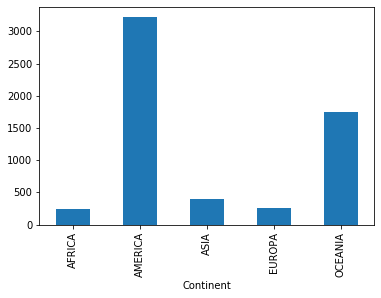

In [15]:
# Usé este plot.bar para que visualmente se pueda observar más claro los diferentes ataques por continente
result = df.groupby(["Continent"])
result.size().plot.bar()

In [16]:
# Con el value_counts lo observo de manera porcentual
display(df['Continent'].value_counts(normalize = True))

AMERICA    0.548244
OCEANIA    0.298329
ASIA       0.067849
EUROPA     0.044494
AFRICA     0.041084
Name: Continent, dtype: float64

In [17]:
# Hice un nuevo groupby ahora incluyendo Fatalidad para poder valorar dicho índice por continente
result2 = df.groupby(["Continent", "Fatal (Y/N)"])
result2.size()

Continent  Fatal (Y/N)
AFRICA     N               114
           UNKNOWN           5
           Y               122
AMERICA    #VALUE!           1
           N              2578
           UNKNOWN          35
           Y               601
           n                 1
ASIA       N               196
           UNKNOWN          11
           Y               191
EUROPA     F                 1
           N               169
           UNKNOWN           8
           Y                83
OCEANIA     N                8
           N              1203
           N                 1
           UNKNOWN          33
           Y               505
dtype: int64

In [18]:
# Como obtuve valores distintos intenté unificarlos con strip y upper, y luego únicamente los Y, N, UNKNOWN
# Quedando por fuera un registro 'F' y uno VALUE!
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.upper()
df = df.loc[df['Fatal (Y/N)'].isin(['Y','N','UNKNOWN'])]
result2 = df.groupby(["Continent", "Fatal (Y/N)"])
result2.size()

Continent  Fatal (Y/N)
AFRICA     N               114
           UNKNOWN           5
           Y               122
AMERICA    N              2579
           UNKNOWN          35
           Y               601
ASIA       N               196
           UNKNOWN          11
           Y               191
EUROPA     N               169
           UNKNOWN           8
           Y                83
OCEANIA    N              1212
           UNKNOWN          33
           Y               505
dtype: int64

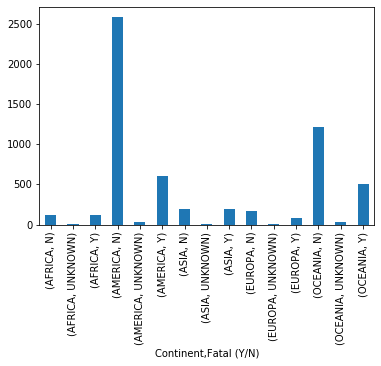

In [19]:
# Usé plot.bar para dar una mejor visual, ya puedo ir observando que ataque no se asocia con fatalidad
result2.size().plot.bar()

In [20]:
# Vuelvo a usar el value_counts normalize True para ver el % de fatalidad
display(df['Fatal (Y/N)'].value_counts(normalize = True))

N          0.726429
Y          0.258054
UNKNOWN    0.015517
Name: Fatal (Y/N), dtype: float64

In [21]:
# Le asigno un valor a una nueva columna llamada Total para que me de registros y % totales por cada continente
# El percent del continente lo divido por el len del continente.index para obtenerlo para cada uno de ellos
# Este paso lo repito para cada continente
cuenta = 1
df['Total'] = cuenta
africaDf = df[df['Continent'] == 'AFRICA']
africaDf['Percent Africa'] = (1 / len(africaDf.index))*100
africaDf.groupby(['Continent', 'Fatal (Y/N)']).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Total  Percent Africa
Continent Fatal (Y/N)                       
AFRICA    N              114       47.302905
          UNKNOWN          5        2.074689
          Y              122       50.622407

In [22]:
americaDf = df[df['Continent'] == 'AMERICA']
americaDf['Percent America'] = (1 / len(americaDf.index))*100
americaDf.groupby(['Continent', 'Fatal (Y/N)']).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total  Percent America
Continent Fatal (Y/N)                        
AMERICA   N             2579        80.217729
          UNKNOWN         35         1.088647
          Y              601        18.693624

In [23]:
oceaniaDf = df[df['Continent'] == 'OCEANIA']
oceaniaDf['Percent Oceania'] = (1 / len(oceaniaDf.index))*100
oceaniaDf.groupby(['Continent', 'Fatal (Y/N)']).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total  Percent Oceania
Continent Fatal (Y/N)                        
OCEANIA   N             1212        69.257143
          UNKNOWN         33         1.885714
          Y              505        28.857143

In [26]:
asiaDf = df[df['Continent'] == 'ASIA']
asiaDf['Percent Asia'] = (1 / len(asiaDf.index))*100
asiaDf.groupby(['Continent', 'Fatal (Y/N)']).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total  Percent Asia
Continent Fatal (Y/N)                     
ASIA      N              196     49.246231
          UNKNOWN         11      2.763819
          Y              191     47.989950

In [25]:
europaDf = df[df['Continent'] == 'EUROPA']
europaDf['Percent Europa'] = (1 / len(europaDf.index))*100
europaDf.groupby(['Continent', 'Fatal (Y/N)']).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total  Percent Europa
Continent Fatal (Y/N)                       
EUROPA    N              169       65.000000
          UNKNOWN          8        3.076923
          Y               83       31.923077

In [ ]:
# Al final observo que los ataques no se asocian a la fatalidad, ya que en continentes como América u Oceania
# que es donde se obtuvo mayores datos de ataques existe un porcentaje bajo de fatalidad,
# en cambio en continentes como Africa o Asia el porcentaje de fatalidad es bastante elevado, sobrepasando un 50%
# en uno y en el otro casi llegando al 50%, eso puede concluir en 2 resultados: 
# 1) Que los tiburones son mas letales en esos continentes, o
# 2) Las asistencias son más precarias y por lo tanto la fatalidad se hace más presente.